In [1]:
import torch
import torch.nn as nn
from torch.nn import Sequential, ReLU, Module, Dropout, Sigmoid, Linear, BatchNorm2d
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA

In [2]:
if (torch.cuda.is_available()):
    print("CUDA is available")
    device = 'cuda'
else:
    print("CUDA is not available")
    device = 'cpu'

device = torch.device(device)
device

CUDA is available


device(type='cuda')

In [3]:
df = pd.read_csv('../Lab 1/mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = df["label"]
data = df.iloc[:,1:]
# labels

In [5]:
class CustomImageDataset(Dataset):

    def __init__(self, labels, img_df):
        self.img_labels = labels
        self.img_data = img_df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.img_data.iloc[idx, :]
        image = np.array(image).astype(np.float32)
        image = np.reshape(image, (28,28))
        label = self.img_labels.iloc[idx]
        return image, label

    def get_PCA(self):
        pca = PCA(n_components=10*10)
        new_df = pca.fit_transform(self.img_data)
        return new_df, self.img_labels
        

In [6]:
dataset = CustomImageDataset(labels, data)

Class =  5


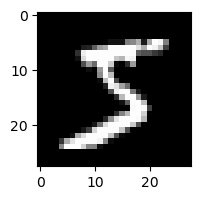

Class =  0


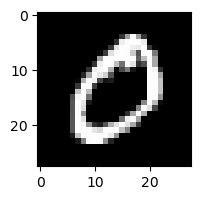

Class =  4


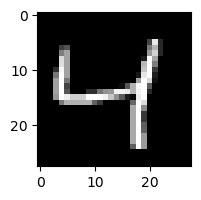

Class =  1


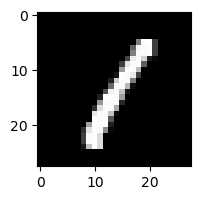

Class =  9


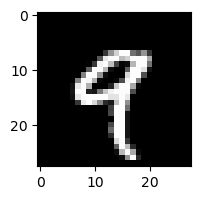

Class =  2


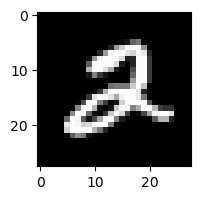

Class =  3


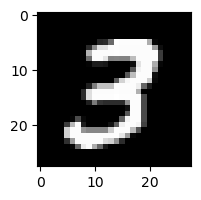

Class =  6


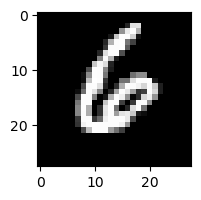

Class =  7


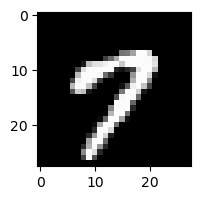

Class =  8


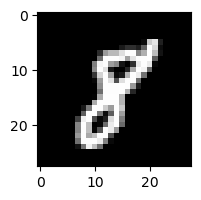

In [7]:
plotted = set()

for i in range(len(dataset)):
    image, label = dataset[i]

    if(label not in plotted):
        print("Class = ",label)
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap='gray')
        plt.show()
        plotted.add(label)

    

## PCA

PCA Image array
[[ 1.23932587e+02 -3.12674255e+02 -2.45140514e+01 -5.55757935e+02
  -2.72966690e+01 -2.32476288e+02  2.33995682e+02  1.59799561e+02
  -3.63515045e+02  1.98428223e+02]
 [ 1.97496796e+02 -2.54056107e+02 -1.13497131e+02  7.49302124e+02
   2.19258118e+02 -4.69300413e+00  3.30151428e+02  3.09154449e+02
   2.77589661e+02  1.66329697e+02]
 [ 2.75392838e+01 -6.43546143e+01 -2.17171906e+02  2.50248474e+02
   4.61628609e+01  1.00327820e+02 -3.08011505e+02  1.70104034e+02
  -1.25524414e+02 -1.23398178e+02]
 [-9.79465942e+01  3.45829544e+01  1.07490860e+02  8.46227493e+01
  -1.52408249e+02  2.00750153e+02  6.51961670e+01  2.00259583e+02
   1.57639618e+02 -3.59689117e+02]
 [ 1.85607010e+02  1.54537979e+02 -4.01754112e+01 -8.52155228e+01
  -1.23564247e+02  6.96162558e+00  1.27434280e+02 -7.67378006e+01
   3.40494537e+01  2.03681335e+01]
 [ 1.29469193e+02 -1.09722710e+02 -1.18390236e+02  8.77756729e+01
   3.12053633e+00 -1.64621689e+02 -1.19406364e+02 -6.09422874e+01
  -1.47810806e+02

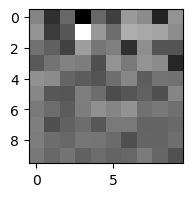

In [8]:
pca_plotted = set()
pca_data, labels = dataset.get_PCA()

for i in range(len(pca_data)):
    image = pca_data[i, :]
    image = np.array(image).astype(np.float32)

    print("PCA Image array")
    print(image.reshape(10,10),"\n")

    print("Label")
    print(labels[i])

    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(10,10), cmap='gray')
    plt.show()
    break
    

## Data Loader

In [9]:
trainloader = DataLoader(dataset, batch_size=64, shuffle=True)

for i, batches in enumerate(trainloader):
    for batch in batches:
        print("Batch size = ", len(batch))
        print("Image size in batch =",batch[0].shape)
        break
    break

Batch size =  64
Image size in batch = torch.Size([28, 28])
